<a href="https://colab.research.google.com/github/tgusmao/programacao_ds/blob/master/TrabalhoPratico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Trabalho Prático de Programação para Ciências de Dados**

Dupla: 
*   Tammy Hikari Yanai Gusmão
*   Thalita Naiara Andre Alves


Trabalho Prático para obtenção de nota na disciplina de Programação para Ciências de Dados - Turma 1 de 2020.

##Instalações e Importações Utilzadas

In [ ]:
!pip install geopandas

In [3]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import matplotlib.colors as pltc
from random import sample
import string
import re
import time
#import nltk
from tabulate import tabulate
import collections
import geopandas as gpd
from geopandas import GeoDataFrame
import seaborn as sns

##Importação da Base de Dados

Iniciando abaixo a leitura do arquivo CSV local (localizado no Google Drive)

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df_original = pd.read_csv('/content/drive/Shared drives/trabalhoPratico_programacaoDS/dados-curso-completo.csv', sep = ',', skiprows = 0, encoding = 'utf-8')

In [ ]:
#cópia da base original
df_copia_original = df_original.copy()

##Resumo do dataset original



A base de dados contém informações sobre tuítes sobre a COVID-19, postados durante o primeiro semestre do ano de 2020. A base foi levemente pré-processada anteriormente pelo professor da disciplina.  

In [7]:
print('Quantidade de linhas:', df_original.shape[0])
print('Quantidade de colunas:', df_original.shape[1])

Quantidade de linhas: 1658825
Quantidade de colunas: 13


Como pode ser visto acima, o atributo *shape* retornou uma tupla contendo a quantidade de linhas e colunas que constituem a base: 1.658.825 linhas e 13 colunas. 

Abaixo observamos uma tabela contendo os nomes das colunas, os tipos preponderantes em cada uma delas, as quantidades de valores nulos, não nulos e únicos para cada coluna. 

In [6]:
colunas = []

for col in df_original.columns:
  colunas.append(col)

In [8]:
qntd_nulos = []
lista_nulos = df_original.isnull().sum()

for x in lista_nulos:
  qntd_nulos.append(x)

In [9]:
qntd_nao_nulos = []
lista_nao_nulos = df_original.notnull().sum()

for x in lista_nao_nulos:
  qntd_nao_nulos.append(x)

In [13]:
valores_unicos = []

for x in colunas:
  valores_unicos.append(int(df_original[x].nunique()))

In [14]:
dados = {'colunas': colunas,
         'tipos': df_original.dtypes,
         'qntd_nulos': qntd_nulos,
         'qntd_nao_nulos': qntd_nao_nulos,
         'qntd_valores_unicos': valores_unicos}

In [15]:
resumo_dataset = pd.DataFrame (dados, columns = ['colunas','tipos', 'qntd_nulos', 'qntd_nao_nulos', 'qntd_valores_unicos']).reset_index(drop=True)

In [16]:
print(tabulate(resumo_dataset, headers = 'keys', tablefmt = 'psql')) 

+----+------------+---------+--------------+------------------+-----------------------+
|    | colunas    | tipos   |   qntd_nulos |   qntd_nao_nulos |   qntd_valores_unicos |
|----+------------+---------+--------------+------------------+-----------------------|
|  0 | data       | object  |            0 |          1658825 |               1202322 |
|  1 | usuario    | object  |           57 |          1658768 |                632601 |
|  2 | apelido    | object  |            0 |          1658825 |                774516 |
|  3 | texto      | object  |            0 |          1658825 |               1653599 |
|  4 | retweet    | int64   |            0 |          1658825 |                  9978 |
|  5 | seguidores | int64   |            0 |          1658825 |                 83882 |
|  6 | idioma     | object  |            0 |          1658825 |                    59 |
|  7 | lugar      | object  |      1584220 |            74605 |                  4500 |
|  8 | pais       | object  |   

Os tipos de variáveis que consistem o dataframe são *object* (string), *int64* (número inteiro) e *float64* (número real). Dados relativos a data, *username*, nome de perfil, tweet, país, sigla e lugar são informações textuais. As colunas retweet e seguidores possuem dados quantitativos cujo menor valor é zero. Latitude e longitude são referentes as coordenadas geográficas, portanto, representados por números reais. 

Levando em consideração o achado acima, faz-se necessário o preenchimento apropriado para eliminar os espaços vazios presentes no dataset. Esta atividade é realizada na seção seguinte (Tratamento de Dados).

Em termos de porcentagem, temos os seguintes gráficos abaixo:

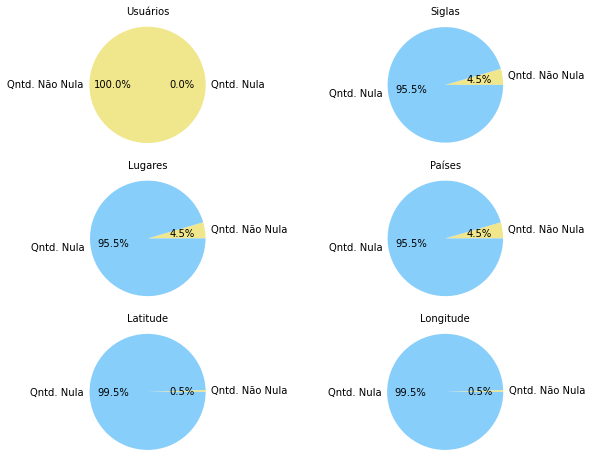

In [17]:
#Gera pie charts para quantidades nulas e não nulas para as colunas:
#usuario, sigla, lugar, pais, latitude e longitude

fig, eixos = plt.subplots(nrows=3, ncols=2, figsize=(8,8))

eixos[0,0].pie([df_original.usuario.notnull().sum(), df_original.usuario.isnull().sum()], 
             labels = ['Qntd. Não Nula', 'Qntd. Nula'],
                     autopct='%1.1f%%', 
                     colors = ['khaki', 'lightskyblue'])

eixos[0,0].set_title('Usuários',  fontsize=10)
eixos[0,0].axis('equal')


eixos[0,1].pie([df_original.sigla.notnull().sum(), df_original.sigla.isnull().sum()], 
             labels = ['Qntd. Não Nula', 'Qntd. Nula'],
                     autopct='%1.1f%%', 
                     colors = ['khaki', 'lightskyblue'])

eixos[0,1].set_title('Siglas',  fontsize=10)
eixos[0,1].axis('equal')

eixos[1,0].pie([df_original.lugar.notnull().sum(), df_original.lugar.isnull().sum()], 
             labels = ['Qntd. Não Nula', 'Qntd. Nula'],
                     autopct='%1.1f%%', 
                     colors = ['khaki', 'lightskyblue'])

eixos[1,0].set_title('Lugares',  fontsize=10)
eixos[1,0].axis('equal')

eixos[1,1].pie([df_original.pais.notnull().sum(), df_original.pais.isnull().sum()], 
             labels = ['Qntd. Não Nula', 'Qntd. Nula'],
                     autopct='%1.1f%%', 
                     colors = ['khaki', 'lightskyblue'])

eixos[1,1].set_title('Países',  fontsize=10)
eixos[1,1].axis('equal')

eixos[2,0].pie([df_original.latitude.notnull().sum(), df_original.latitude.isnull().sum()], 
             labels = ['Qntd. Não Nula', 'Qntd. Nula'],
                     autopct='%1.1f%%', 
                     colors = ['khaki', 'lightskyblue'])

eixos[2,0].set_title('Latitude',  fontsize=10)
eixos[2,0].axis('equal')

eixos[2,1].pie([df_original.longitude.notnull().sum(), df_original.longitude.isnull().sum()], 
             labels = ['Qntd. Não Nula', 'Qntd. Nula'],
                     autopct='%1.1f%%', 
                     colors = ['khaki', 'lightskyblue'])

eixos[2,1].set_title('Longitude',  fontsize=10)
eixos[2,1].axis('equal')

# Ajusta o espaço entre os gráficos
plt.subplots_adjust(wspace=1)
plt.savefig('/content/drive/Shared drives/trabalhoPratico_programacaoDS/img/resumo_piechar_nulos_naoNulos.png')
plt.show()

*idioma*, *sigla*, *pais* e *lugar* são atributos categróricos, isto é, caracterizam o tweet e/ou o usuário que postou o tweet. Como não houve restrição na coleta dedados quanto a localização e idioma, o dataset possui tweets do mundo todo como pode ser observado nas estatísticas abaixo, que apresentam os dez primeiros itens com maiores ocorrências:

In [ ]:
def get_df_itens_por_coluna(df, nome_coluna):
  return df[nome_coluna].value_counts().to_frame()

In [ ]:
def set_nome_coluna(df, coluna_antiga, coluna_nova):
  return df.rename(columns = {coluna_antiga:coluna_nova})

In [ ]:
def calcula_df_porcentagem (df, nome_coluna, tam):
  return round(((df[nome_coluna] * 100)/tam), 2)

In [ ]:
#col_principal = coluna principal
#nova_col_1 = nome da nova coluna que conterá os valores da col_principal
#nova_col_2 = nome da coluna que conterá os valores do index
#coluna4 = qualquer nome de coluna para guardar porcentagens

def organiza_itens_unicos(df, col_principal, nova_col_1, nova_col_2, coluna4 = 'porcentagem'):

  #lista = df[col_principal].value_counts().to_frame()
  lista = get_df_itens_por_coluna(df, col_principal)
  lista = set_nome_coluna(lista, col_principal, nova_col_1)
  lista[coluna4] =  calcula_df_porcentagem(lista, nova_col_1, df.shape[0])
  lista[nova_col_2] = lista.index

  return lista.reset_index(drop=True)

## Tratamento de Dados

De acordo com os achados apresentados anteriormente, as colunas *usuario*, *lugar*, *pais*, *sigla*, *latitude* e *longitude* possuem grande quantidade de valores nulos. As quatro primeiras colunas terão os espaços vazios preenchidos. Por conta da natureza dos atributos, *latitude* e *longitude* serão mantidos como estão para uma análise posterior.

A seguir, temos o preenchimento de dados aplicados somente nas colunas *usuario*, *lugar*, *pais* e *sigla*. 

In [18]:
df_original['usuario'] = df_original['usuario'].fillna('')
df_original['lugar'] = df_original['lugar'].fillna('Não Informado')
df_original['pais'] = df_original['pais'].fillna('Não Informado')
df_original['sigla'] = df_original['sigla'].fillna('Não Informado')

Em uma busca manual, foi percebido que existem tweets em línguas estrangeiras que com o valor **pt** na coluna idioma. Abaixo podemos conferir alguns exemplos:

In [ ]:
textos = df_original[['texto', 'idioma', 'pais']].loc[[231939, 48469, 32238]]
print(tabulate(textos, headers = 'keys', tablefmt = 'psql'))

+--------+------------------------------------------------------------------------------------------------------------------------------------+----------+-----------+
|        | texto                                                                                                                              | idioma   | pais      |
|--------+------------------------------------------------------------------------------------------------------------------------------------+----------+-----------|
| 231939 | @GermanNkhwanana Aa ba neele #Lockdown level 5 pele. 😂😂😂                                                                        | pt       | Botswana  |
|  48469 | Náutico. Día 58. #cuarentena #quarantine #covid_19 #náutica #paisajesurbanos #barcos #yates #arquitectura… https://t.co/AvgHo4trFr | pt       | Argentina |
|  32238 | Tengo dos rollos para revelar. 💁😁                                                                                                | pt       | Argentina |
+--

Inicialmente foram experimentadas algumas das bibliotecas disponíveis para detecção automática de idiomas. Foram elas **langdetect**, **TextBlob** e **googletrans** (um API do Google Tradutor).

Langdetect e TextBlop apresentaram limitações quanto ao tamanho do texto (tweet) e a quantidade de requisições seguidas. Já o Google Tradutor, apesar de não ter apresentado nenhum dos impedimentos das bibliotecas mencionadas anteriormente, não se mostrou um tradutor confiável. Ademais, todas as três bibliotecas detectaram idiomas errados diversas vezes (pt -> en e vice-versa). Isto provavelmente se deve ao linguajar informal, que pode conter palavras de outros idiomas (crush, top, le, etc.) ou mesmo reduções de palavras e suas variações (q, pq, tô, to, etc.), que podem dificultar a identificação correta do idioma de um texto. 

As divergências idiomáticas apresentadas no dataset podem se dar pelos seguintes fatores:
* Um país pode ter uma língua oficial, mas possui outras não oficiais.
* Um país possui mais de uma língua oficial.
* O usuário do twitter é poliglota.

Portanto, o idioma informado no dataset não é um bom indicador de localização geográfica. 

Ainda na busca manual, foi conferido que existem itens repetidos:

In [ ]:
textos = df_original[['apelido', 'texto']].loc[[234865, 551107, 133775, 813962]]
print(tabulate(textos, headers = 'keys', tablefmt = 'psql'))

+--------+-----------------+------------------------------------------------------------------------------------------------------------------------------------+
|        | apelido         | texto                                                                                                                              |
|--------+-----------------+------------------------------------------------------------------------------------------------------------------------------------|
| 234865 | Heliane21902838 | Jair Bolsonaro : PROTOCOLO PARA HIDROXICLOROQUINA #naopercamosmaistempo - Assine a petição! https://t.co/n1xizwU5HL via @change_br |
| 551107 | Heliane21902838 | Jair Bolsonaro : PROTOCOLO PARA HIDROXICLOROQUINA #naopercamosmaistempo - Assine a petição! https://t.co/n1xizwU5HL via @change_br |
| 133775 | Erick__Matoso   | "Brasil tem 6.836 casos e 240 mortes por Covid-19" #Coronavirus https://t.co/AXlm9oB8n8                                            |
| 813962 | Erick__Matoso   |

Para tanto, foi aplicada a função de remoção de linhas duplicadas:

In [19]:
df_reduzida = pd.DataFrame.drop_duplicates(df_original)
print('Foram removidas', df_original.shape[0] - df_reduzida.shape[0], 'linhas.')
print('Quantidade atual de linhas: '+ format(df_reduzida.shape[0])+'.')

Foram removidas 2 linhas.
Quantidade atual de linhas: 1658823.


A remoção da linhas duplicadas mostra que haviam 2 tweets repetidos no dataset. Somente os tweets originais permaceram no dataset.

###**Métodos de Detecção de Perguntas**


Foram desevolvidas duas funções que auxiliam na aquisição de um trecho específico de um tweet, o que contém a(s) pergunta(s). Cada pergunta se torna um novo item em um novo dataframe (DuvidasDB). O novo dataframe contém o índice do dataframe original (df_reduzida) e seus respectivos dados para uso posterior. Como delimitador, buscamos apenas frases que terminem com ponto de interrogação, a fim de não delimitar abundamentemente a identificação e aquisição de perguntas. Vale lembrar que existem línguas estrangeiras que não utilizam o ponto de interrogação com frequência, ou mesmo faz parte da regra gramatical formal. 

In [20]:
def get_question_by_text(text):
  questions = []
  text = text.replace('\n', ' ')

  regular_expression = '(\S[^?.!]*[?!.]*)*'
  sentences = re.split(regular_expression, text)
  for sentence in sentences:
    if not sentence.isspace() and '?' in sentence:
      questions.append(sentence)
  return questions

def extract_questions(df_reduzida):
  dic = []
  for index, row in df_reduzida.iterrows():

    questions = get_question_by_text(row['texto'])

    for question in questions:

      dic.append({'id': index, 
                  'pergunta': question,
                  'idioma': row['idioma'],
                  'data': row['data'], 
                  'apelido': row['apelido'], 
                  'retweet': row['retweet'],
                  'seguidores': row['seguidores'],
                  'lugar': row['lugar'],
                  'pais': row['pais'],
                  'sigla': row['sigla'],
                  'latitude': row['latitude'],
                  'longitude': row['longitude'],
                  'hashtags': row['hashtags']})
  
  df_questions = pd.DataFrame(dic, 
                              columns = ['id',
                                         'pergunta',
                                         'idioma',
                                         'data',
                                         'apelido',
                                         'retweet',
                                         'seguidores',
                                         'lugar',
                                         'pais',
                                         'sigla',
                                         'latitude',
                                         'longitude',
                                         'hashtags'])
  return df_questions

In [ ]:
DuvidasDB = extract_questions(df_reduzida)

/usr/lib/python3.6/re.py:212: FutureWarning: split() requires a non-empty pattern match.
  return _compile(pattern, flags).split(string, maxsplit)


###**Classificação das Perguntas**

Os códigos das células abaixo mostarão as 50 palavras/termos mais comuns dentre os tweets. Esse mecanismo foi utilizado para auxiliar na produção de um dicionário contendo palavras-chaves que indicarão a classificação do tweet em questão. 

A lista de stopwords foi adquirida [neste link](https://github.com/stopwords-iso/stopwords-pt/blob/master/stopwords-pt.txt). A lista foi incrementada a cada iteração de identificação de palavras mais comuns, com o objetivo de obter o máximo de palavras-chaves possíveis.

In [ ]:
#Adquirindo uma lista de stopword, presente no Drive compartilhado.
stopwords = set(line.strip() for line in open ('/content/drive/Shared drives/trabalhoPratico_programacaoDS/pt_stop_words.txt'))

In [ ]:
#Instanciar um dicionário onde, para cada palavra contada, a palavra (inexistente no dict).
#Se já existir, sua contagem incrementa.

wordcount = {}

for index, row in DuvidasDB.iterrows():
  for word in row['pergunta'].lower().split():
      word = word.replace(".","")
      word = word.replace(",","")
      word = word.replace(":","")
      word = word.replace("\"","")
      word = word.replace("!","")
      word = word.replace("â€œ","")
      word = word.replace("â€˜","")
      word = word.replace("*","")
      word = word.replace("?","")
      word = word.replace("+","")
      if word not in stopwords:
          if word not in wordcount:
              wordcount[word] = 1
          else:
              wordcount[word] += 1

In [ ]:
#Imprime as palavras mais repetidas:

n_print = 10

print("As {} palavras mais mencionadas são as seguintes:".format(n_print))
word_counter = collections.Counter(wordcount)

for word, count in word_counter.most_common(n_print):
    print(word, ": ", count)

As 10 palavras mais mencionadas são as seguintes:
 :  20233
pandemia :  14348
quarentena :  14276
cloroquina :  12122
corona :  9989
coronavírus :  9765
social :  9741
covid-19 :  9710
vírus :  8485
isolamento :  7971


Abaixo, temos o dicionário que gerado manualmente. Sua construção também tem base em pesquisas a parte. 

In [ ]:
dict_categorias = {
'cura':'Medicamento',
'tratamento':'Medicamento',
'curar':'Medicamento',
'cloroquina':'Medicamento',
'hidroxicloroquina':'Medicamento',
'ministro':'Pessoas',
'ministério':'Organizações',
'emissora':'Organizações',
'jornal':'Organizações',
'contra':'Medicamento',
'combate': 'Medicamento',
'especialista':'Pessoas',
'mandetta':'Pessoas',
'melhora':'Medicamento',
'vacina':'Medicamento',
'vacinas':'Medicamento',
'tamiflu':'Medicamento',
'atazanavir':'Medicamento',
'remdesivir':'Medicamento',
'ivermectina':'Medicamento',
'azitromicina':'Medicamento',
'who':'Organizações',
'oms':'Organizações',
'organização':'Organizações',
'organizações':'Organizações',
'fiocruz':'Organizações',
'fundação': 'Organizações',
'fundações': 'Organizações',
'funasa':'Organizações',
'opas':'Organizações',
'pan-americana': 'Organizações',
'teich':'Pessoas',
'etienne':'Pessoas',
'@jairbolsonaro':'Pessoas',
'bolsonaro':'Pessoas',
'@lhmandetta':'Pessoas',
'@jdoriajr':'Pessoas',
'doria':'Pessoas',
'dória':'Pessoas',
'@bolsonarosp':'Pessoas',
'@veramagalhaes':'Pessoas',
'@minsaude':'Organizações',
'@folha':'Organizações',
'@estadao':'Organizações',
'folha':'Organizações',
'Estadão':'Organizações',
'@rodrigomaia':'Pessoas',
'@g1':'Organizações',
'g1':'Organizações',
'@teichnelson':'Pessoas',
'@wilsonwitzel':'Pessoas',
'@o_antagonista':'Pessoas',
'@cnnbrasil':'Organizações',
'@rconstantino':'Pessoas',
'@uolnoticias':'Organizações',
'ivermectina':'Medicamento',
'@osmarterra':'Pessoas',
'@carlosbolsonaro':'Pessoas',
'@bbcbrasil':'Organizações',
'trump':'Pessoas',
'uso':'Medicamento',
'mascara':'Medicamento',
'máscara':'Medicamento',
'alcool':'Medicamento',
'álcool':'Medicamento',
'gel':'Medicamento',
'70%':'Medicamento',
'combater':'Medicamento',
'doença':'Doença',
'pandemia':'Doença',
'corona':'Doença',
'coronavírus':'Doença',
'coronavirus':'Doença',
'coronga':'Doença',
'covid-19':'Doença',
'covid19':'Doença',
'covid':'Doença',
'sars-cov-2':'Doença',
'sintoma':'Doença',
'sintomas':'Doença',
'caso':'Doença',
'casos':'Doença',
'covidao':'Doença',
'infecção': 'Doença',
'contágio':'Doença',
'coriza':'Doença',
'dor':'Doença',
'febre':'Doença',
'falta':'Doença',
'ar':'Doença',
'tosse':'Doença',
'vírus':'Doença',
'virus':'Doença'
}

A função classificador() recebe a pergunta e cada palavra da frase é comparada aos termos existentes no dicionário. Se iguais, o retorno é a categoria respectiva da palavra. Caso não sejam iguais, a categoria devolvida é *Outro*, que pode ser definida por diversas peculiaridades (a pergunta está em outro idioma, o contexto não faz referência direta ao vírus, etc.).

In [ ]:
#Função classificadora de tuítes
#Antes de comparações, retira as pontuações finais (o que vier a partir do '?')
#Recebe o texto do tuíte e retorna a classificação

def classificador(texto):

  inicio = texto.find('?')
  t = texto[:-(len(texto) - inicio)]

  t = t.split()

  for palavra in t:
    l = len(palavra)
      
    for key, value in dict_categorias.items():
      if ( palavra.lower() == key):
        return value

  return 'Outro'

Abaixo temos o dataframe atualizado com as categorias das suas respectivas perguntas. 

In [ ]:
DuvidasDB['categoria'] = DuvidasDB.apply(lambda row: classificador(row['pergunta']), axis = 'columns')

In [ ]:
#Persistência dos dados já obtidos
#DuvidasDB.to_csv('/content/drive/Shared drives/trabalhoPratico_programacaoDS/DuvidasDB.csv', sep = '|')  

##**Visão Geral do Resultado**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
DuvidasDB = pd.read_csv('/content/drive/Shared drives/trabalhoPratico_programacaoDS/DuvidasDB.csv', sep = '|', skiprows = 0, encoding = 'utf-8')

In [23]:
def get_item_unico_cont(_df, nome_coluna):
  unique_elements, counts_elements = np.unique(_df[nome_coluna], return_counts=True)
  df = pd.DataFrame({nome_coluna: unique_elements,
                     'qntd': counts_elements})
  return df

In [24]:
df_categorias = get_item_unico_cont(DuvidasDB, 'categoria')

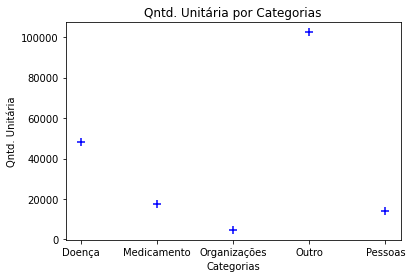

In [25]:
#Gera gráfico de distribuição considerando categorias e 
#a quantidade de perguntas para cada uma delas.

plt.scatter(df_categorias.categoria,
            df_categorias.qntd, 
            color='b', 
            s=70, 
            marker="+")

plt.xlabel('Categorias')
plt.ylabel('Qntd. Unitária')

plt.title('Qntd. Unitária por Categorias')

#plt.savefig('/content/drive/Shared drives/trabalhoPratico_programacaoDS/img/categorias_em_qntd.png')

plt.show()

Como pode ser visto no gráfico abaixo, a categoria com mais ocorrências é "Outro", criada para classificar perguntas que não se encaixam em nenhuma das outras quatro. O motivo para um número tão grande pode se dar através da perda do contexto ao selecionar e considerar somente a pergunta contida no tweet.

Na ordem de maiores ocorrências, temos:

1.   Doença
    - Categoria genérica.
    - Dicionário com vocábulos insuficientes.
    - Palavras-chaves digitadas erroneamente.


2.   Medicamento
    - Busca por medicamentos alternativos ou provisórios.

3.   Pessoas
    - Diversos perfis (presidentes, governadores, jornalistas, biólogos, estatísticos, etc.).
    - Alguns se disponibilizam a ter mais contato com internautas. 

4.   Organizações
    - Criação e conscientização de protocolos de saúde.
    - Aquisição de aparelhos técnicos/hospitalares.
    - Estudos mais bem fundamentados. 

As seções seguintes tratam de Análises Geográfica e Temporal do dataset de perguntas adquirido. 

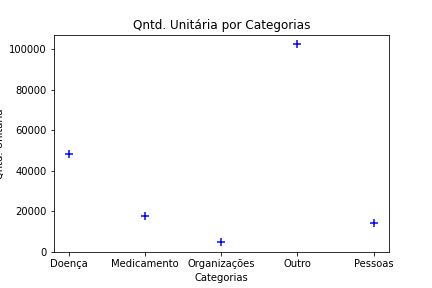

##**Análise Geográfica**

####Introdução

In [26]:
#Obtenção de um dataset que contém a geometria de todos os países
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [27]:
#Devolve um dataframe filtrado com a categoria informada
#Se tiver uma coluna geometry, a função a exclue.

def get_df_geo_categoria(df, categoria):

  if ('geometry' in df):
    df.drop(['geometry'], axis=1, inplace = True)

  return df.query('categoria == @categoria')

In [28]:
#Gera um dataframe (a partir de outro) filtrando por país específico.

def get_df_geo_pais(df, pais):
  return df.query('pais == @pais')

In [29]:
#Função geradora de geodataframe

def get_geodataframe(df, categoria):
  return GeoDataFrame(df, geometry = gpd.points_from_xy(df.latitude, df.longitude))

In [31]:
#Seleção de dataframes organizados por categorias:
#Também inclui a exclusão da coluna geometry

#Categoria Doença
df_geo_doenca = get_df_geo_categoria(DuvidasDB, 'Doença')

#Categoria Medicamento
df_geo_med = get_df_geo_categoria(DuvidasDB, 'Medicamento')

#Categoria Organizações
df_geo_org = get_df_geo_categoria(DuvidasDB, 'Organizações')

#Categoria Pessoas
df_geo_pe = get_df_geo_categoria(DuvidasDB, 'Pessoas')

#Categoria Outro
df_geo_outro = get_df_geo_categoria(DuvidasDB, 'Outro')

In [32]:
#Geração de geodataframes de cada categoria:

gdf_doenca = get_geodataframe(df_geo_doenca)

gdf_med = get_geodataframe(df_geo_med)

gdf_org = get_geodataframe(df_geo_org)

gdf_pe = get_geodataframe(df_geo_pe)

gdf_outro = get_geodataframe(df_geo_outro)

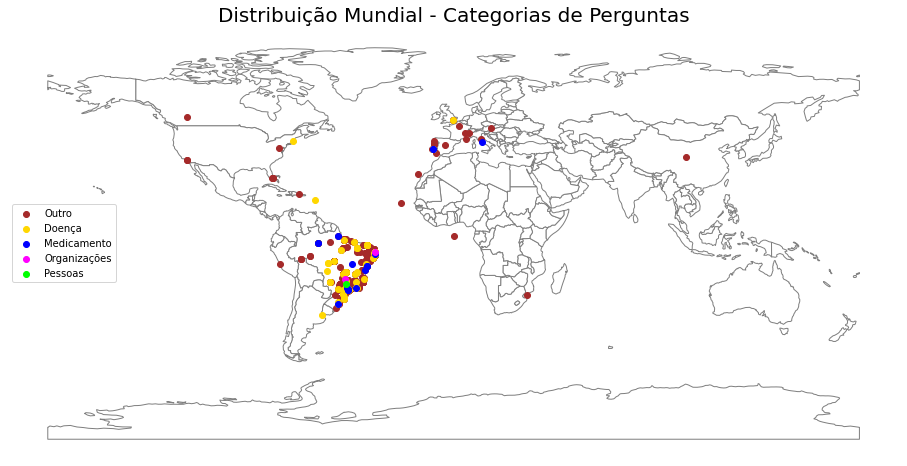

In [33]:
#Gera gráfico de distribuição mundial das categorias das perguntas

ax = world.plot(color='white', 
                marker = 'o', 
                edgecolor='grey', 
                markersize = 20,
                figsize=(16, 10))

gdf_outro.plot(ax=ax, color='brown', label = 'Outro')
gdf_doenca.plot(ax=ax, color='gold', label = 'Doença')
gdf_med.plot(color='blue', ax=ax, label = 'Medicamento')
gdf_org.plot(ax=ax, color='fuchsia', label = 'Organizações')
gdf_pe.plot(ax=ax, color='lime', label = 'Pessoas')

ax.set_title('Distribuição Mundial - Categorias de Perguntas',fontsize=20)
ax.axis('off')

plt.legend(loc = 'center left')
#plt.savefig('/content/drive/Shared drives/trabalhoPratico_programacaoDS/img/geo_mundo_categorias.png')
plt.show()

De acordo com o gráfico abaixo, verifica-se que a maior parte dos tweets foi postada por usuários que estavam no Brasil, com maior concentração nas áreas litorâneas e centro-sul. 

Ainda é observável que Europa Ocidental, os Estados Unidos e um país localizado no Mar do Caribe concentram perguntas referentes a medicamentos e a doença em si.

No entanto, o continente africano, assim como a China, contém apenas perguntas não diretamente relacionadas com as categorias Doença, Medicamento, Organizações e Pessoas. As perguntas, então, podem envolver contextos diferentes como opiniões e visões pessoais, a quarentena e os protocolos de segurança e higiene - distanciamento social, uso de álcool gel 70%, lavar as mãos com frequência, uso de máscaras, etc.

Em resumo, podemos afirmar que a maior parte das perguntas foi realizada por usuários presentes no Brasil e as categorias de perguntas mais frequentes são, respectivamente:
1.   Doença
2.   Medicamento
3.   Organizações
4.   Pessoas


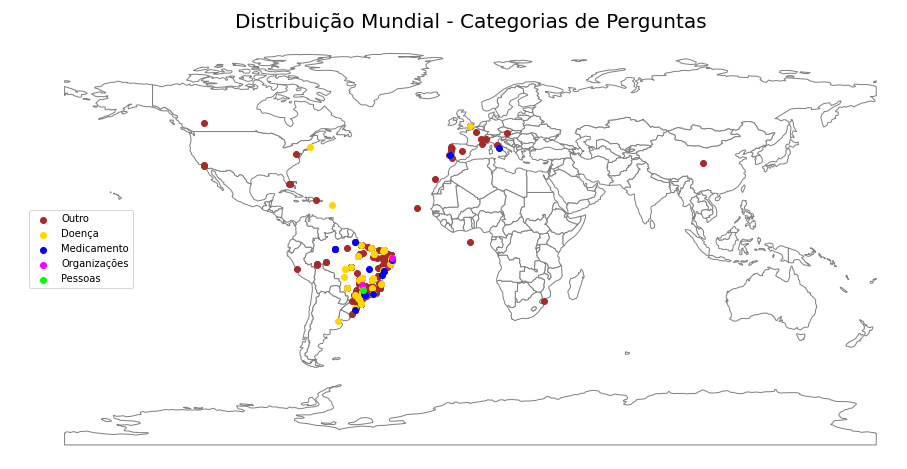

###Perguntas realizadas no Brasil

Como visto anteriormente, o Brasil concentra a maior quantidade de perguntas realizadas por usuários, além de ser o único país no mundo a ter ocorrências únicas nas categorias Organizações e Pessoas. A razão pode estar na limitação do dicionário de vocábulos, que consta nomes/títulos na língua portuguesa. 

Portanto, a análise a seguir focará nas perguntas postadas por usuários que informaram morar no Brasil. 



####Análise Regional

De acordo com o gráfico abaixo, podemos afirmar que o Sudeste é a região que tende a fazer perguntas de diversos contextos, seguido do Nordeste. Basta lembrar que o Sudeste e Nordeste foram os primeiros locais no Brasil a ter casos suspeitos e confirmados. Também devemos considerar que a propagação do vírus foi mais rápida por essas regiões, pois possuem aeroportos internacionais que possuem grande rotatividade de pessoas, além de serem possuierem pontos turísticos preferidos. No caso do Sudeste, há também curiosidade sobre Pessoas e Organizações, pois certos políticos locais estavam bem envolvidos com organizações ligadas a saúde e no combate ao coronavírus. 

Comparada com as outras regiões, o Centro-Oeste costuma ter mais curiosidade sobre notícias da doença em si (sintomas, estatísticas, etc.).

As regiões Norte e Sul mostram interesses em comum voltados para tópicos referentes ao vírus e sua cura. 

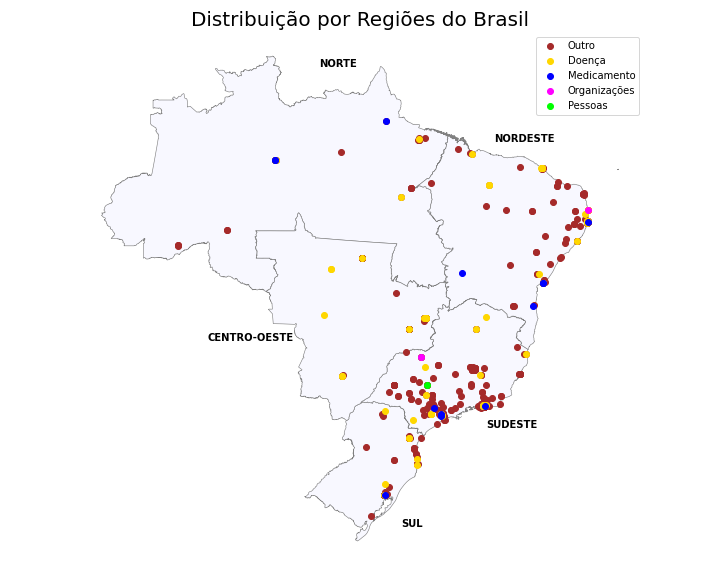

####Análise Estadual

Se observarmos a partir de uma visão estadual, percebemos que São Paulo e Rio de Janeiro são os estados onde mais foram feitas perguntas. 

Uma única pergunta foi feita na categoria Pessoas e ela foi feita por um usuário que estava em São Paulo. 

Paraíba e Minas Gerais foram os únicos estados que tenderam a realizar perguntas sobre Organizações.

Nenhuma pergunta foi feita por quem estava em Tocantins e Roraima. Acre e Rondônia apresentam somente perguntas de contexto aberto (categoria Outro).
Isto pode estar ligado com a baixa densidade demográfrica, como pode ser conferido no gráfico "Distribuição por Densidade Demográfica Estadual".

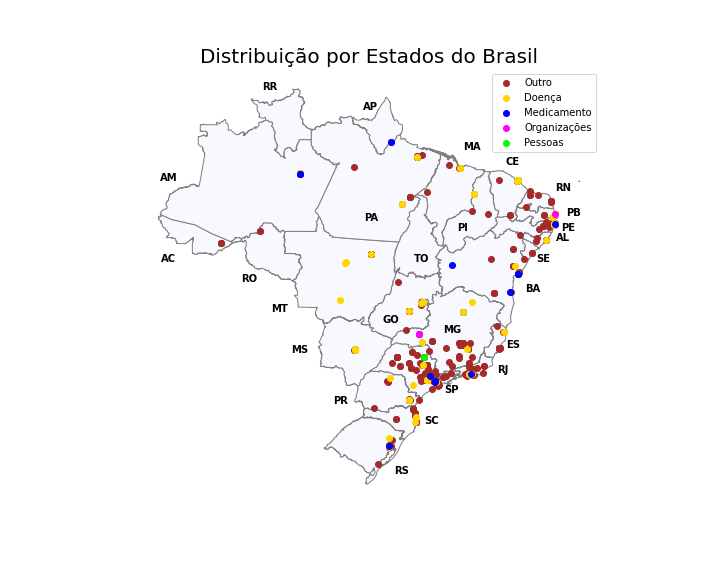

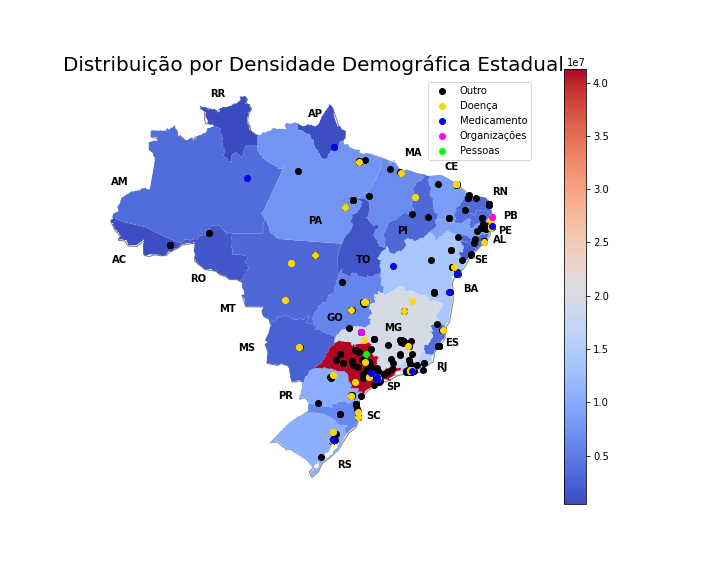

####Código - Distribuição por Regiões do Brasil

In [ ]:
#Função que renderiza textos em mapas
def text(x, y, text):
    ax.text(x, y, text,
            ha='center', va='top', weight='bold', color='black')

In [ ]:
#Obtenção de arquivos shape do Brasil
brazil_regioes = gpd.read_file('/content/drive/Shared drives/trabalhoPratico_programacaoDS/shapes/regioes_2010.shp')

In [ ]:
#Geração de um dataframe reduzido, contendo somente ocorrências do Brasil.
#df_geo_brazil = get_df_geo_pais(DuvidasDB, 'Brazil')

In [ ]:
#Geração de um geodataframe
#gdf_brazil = get_geodataframe(df_geo_brazil)

In [ ]:
#Gera gráfico, com divisórias regionais, da distribuição
#geográfica das categorias

ax = brazil_regioes.plot(color = 'ghostwhite',
                         linewidth=.6, 
                         marker = 'D',
                         markersize = 50,
                         edgecolor='grey',
                         figsize=(10, 8))

text(-55, 5, "NORTE")
text(-62, -17, "CENTRO-OESTE")
text(-40, -1, "NORDESTE")
text(-41, -24, "SUDESTE")
text(-49, -32, "SUL")

ax = plt.gca()

gdf_outro = get_df_geo_pais(gdf_outro, 'Brazil')
gdf_outro.plot(ax=ax, color='brown', label = 'Outro')

gdf_doenca = get_df_geo_pais(gdf_doenca, 'Brazil')
gdf_doenca.plot(ax=ax, color='gold', label = 'Doença')

gdf_med = get_df_geo_pais(gdf_med, 'Brazil')
gdf_med.plot(color='blue', ax=ax, label = 'Medicamento')

gdf_org = get_df_geo_pais(gdf_org, 'Brazil')
gdf_org.plot(ax=ax, color='fuchsia', label = 'Organizações')

gdf_pe = get_df_geo_pais(gdf_pe, 'Brazil')
gdf_pe.plot(ax=ax, color='lime', label = 'Pessoas')

ax.axis('off')

plt.legend(loc = 'upper right')

ax.set_title('Distribuição por Regiões do Brasil',fontsize=20)

plt.tight_layout()
plt.savefig('/content/drive/Shared drives/trabalhoPratico_programacaoDS/img/geo_regional_brazil.png')

####Código - Distribuição por Estados do Brasil

In [ ]:
brazil_estados = gpd.read_file('/content/drive/Shared drives/trabalhoPratico_programacaoDS/shapes/estados_2010.shp')

In [ ]:
#Gera gráfico, com divisórias estaduais, da distribuição
#geográfica das categorias

ax = brazil_estados.plot(color='ghostwhite', 
                         edgecolor='grey', 
                         marker = 'D',
                         markersize = 50,
                         figsize=(10, 8))

gdf_outro.plot(ax=ax, color='brown', label = 'Outro')
gdf_doenca.plot(ax=ax, color='gold', label = 'Doença')
gdf_med.plot(color='blue', ax=ax, label = 'Medicamento')
gdf_org.plot(ax=ax, color='fuchsia', label = 'Organizações')
gdf_pe.plot(ax=ax, color='lime', label = 'Pessoas')

#Colocando tags nos estados
text(-73, -11, "AC")
text(-73, -3, "AM")
text(-63, 6, "RR")
text(-65, -13, "RO")
text(-53, 4, "AP")

text(-53, -7, "PA")
text(-62, -16, "MT")
text(-60, -20, "MS")
text(-56, -25, "PR")
text(-47, -27, "SC")

text(-50, -32, "RS")
text(-43, 0, "MA")
text(-48, -11, "TO")
text(-51, -17, "GO")
text(-45, -24, "SP")

text(-44, -8, "PI")
text(-37, -14, "BA")
text(-45, -18, "MG")
text(-39, -1.5, "CE")
text(-34, -4, "RN")

text(-33, -6.5, "PB")
text(-33.5, -8, "PE")
text(-34, -9, "AL")
text(-36, -11, "SE")
text(-39, -19.5, "ES")
text(-40, -22, "RJ")
#

ax.set_title('Distribuição por Estados do Brasil',fontsize=20)
ax.axis('off')

plt.legend(loc = 'upper right')
plt.savefig('/content/drive/Shared drives/trabalhoPratico_programacaoDS/img/geo_estadual_brazil.png')
plt.show()

####Código - Distribuição por Densidade Demográfica Estadual do Brasil

In [ ]:
brazil_municipios = gpd.read_file('/content/drive/Shared drives/trabalhoPratico_programacaoDS/shapes/municipios_2010.shp')

In [ ]:
#A quantidade populacional e índices estaduais estão em formato de string.
#Casting nos valores das colunas é necessário.

brazil_municipios = brazil_municipios.astype({"populacao":'int64', "estado_id":'int64'}) 

In [ ]:
def cont_populacao_estadual(id): #id do estado
  #populacao = []
  cont = 0
  lista = brazil_municipios[brazil_municipios['estado_id'] == id]

  for index, row in lista.iterrows():
    cont = cont + row['populacao']

  return cont

In [ ]:
brazil_estados['populacao'] = brazil_estados.apply(lambda row: cont_populacao_estadual(row['id']), axis = 'columns')

In [ ]:
#Gera gráfico da distribuição das categorias por divisão estadual 
#em densidades demográficas populacionais.

ax = world[world.name == 'Brazil'].plot(color='white', 
                                         edgecolor='grey',
                                         figsize=(10, 8))

brazil_estados.plot(column='populacao',
           cmap='coolwarm',
           legend=True,
           ax=ax)

gdf_outro.plot(ax=ax, color='black', label = 'Outro')
gdf_doenca.plot(ax=ax, color='gold', label = 'Doença')
gdf_med.plot(color='blue', ax=ax, label = 'Medicamento')
gdf_org.plot(ax=ax, color='fuchsia', label = 'Organizações')
gdf_pe.plot(ax=ax, color='lime', label = 'Pessoas')

#Colocando tags nos estados
text(-73, -11, "AC")
text(-73, -3, "AM")
text(-63, 6, "RR")
text(-65, -13, "RO")
text(-53, 4, "AP")

text(-53, -7, "PA")
text(-62, -16, "MT")
text(-60, -20, "MS")
text(-56, -25, "PR")
text(-47, -27, "SC")

text(-50, -32, "RS")
text(-43, 0, "MA")
text(-48, -11, "TO")
text(-51, -17, "GO")
text(-45, -24, "SP")

text(-44, -8, "PI")
text(-37, -14, "BA")
text(-45, -18, "MG")
text(-39, -1.5, "CE")
text(-34, -4, "RN")

text(-33, -6.5, "PB")
text(-33.5, -8, "PE")
text(-34, -9, "AL")
text(-36, -11, "SE")
text(-39, -19.5, "ES")
text(-40, -22, "RJ")

ax.set_title('Distribuição por Densidade Demográfica Estadual',fontsize=20)
ax.axis('off')

plt.legend(loc = 'upper right')
plt.savefig('/content/drive/Shared drives/trabalhoPratico_programacaoDS/img/geo_estadual_demografico_brazil.png')
plt.show()

##**Análise Temporal**


A respeito da relação quantidade de tweets por mês, temos o seguinte gráfico em barras:

In [ ]:
df_original['mes'] = pd.DatetimeIndex(df_original['data']).month

In [ ]:
df_tweets_mes = df_original['mes'].value_counts().to_frame()
df_tweets_mes = df_tweets_mes.rename(columns = {'mes':'qntd_mes'})
df_tweets_mes['num_mes'] = df_tweets_mes.index
df_tweets_mes.reset_index(drop=True, inplace=True)
df_tweets_mes = df_tweets_mes.sort_values(by='num_mes')

In [ ]:
def defineNomeMes(num_mes):
  if (num_mes == 1):
    return 'Janeiro'
  elif (num_mes == 2):
    return 'Fevereiro'
  elif (num_mes == 3):
    return 'Março'
  elif (num_mes == 4):
    return 'Abril'
  elif (num_mes == 5):
    return 'Maio'
  elif (num_mes == 6):
    return 'Junho'
  elif (num_mes == 7):
    return 'Julho'
  else:
    return 'outro'

In [ ]:
df_tweets_mes['nome_mes'] = df_tweets_mes.apply(lambda row: defineNomeMes(row['num_mes']), axis = 'columns')

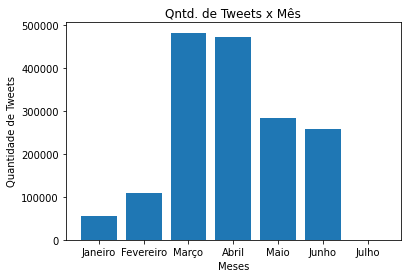

In [ ]:
#Quantidade de Tweets x mês

plt.bar(df_tweets_mes.nome_mes, df_tweets_mes.qntd_mes)
plt.title('Qntd. de Tweets x Mês')
plt.xlabel('Meses')
plt.ylabel('Quantidade de Tweets')
plt.savefig('qntd_tweets_por_mes_df_original.png')
plt.show()

No gráfico acima, podemos observar que:

*   Conforme a COVID-19 é espalhada no exterior a quantidade de tweets sobre o assunto aumenta.
*   Chega ao pico no mês de março, onde diversas metrópoles começam a anunciar casos suspeitos e confirmados. 
*   Em abril ainda temos um número alto de postagens. Trata-se do período em que cidades iniciam o período de quarentena e reforçam mensagens do protocolo de distanciamento social e higiene. 
*   No mês seguinte, há uma queda de aproximadamente 39,68%. Pode-se supor que a queda se dá pela transferência da menção textual ao vírus para menções audiovisuais (memes e vídeos, por exemplo), abordagens indiretas referentes a pandemia, quarentena e pelo emprego dos protocolos de higiene e distantiamento social estipulados mundialmente. 

### Definição dos dataframes

In [ ]:
#  dataframe
df_copy = df_copia_original.copy() #df_reduzida
df_duvidas_copy = DuvidasDB.copy()

In [ ]:
# convert coluna data de object para datatime
# pd.to_datetime(pd.Series(['05/23/2005']))
df_copy.data= pd.to_datetime(df_copy.data)
df_duvidas_copy.data= pd.to_datetime(df_duvidas_copy.data)

# Transformando o datetime em index
df_copy.set_index('data', inplace=True)
df_copy.info()

In [ ]:
# Método criar base com uma coluna para cada categoria
def count_categoria_por_dia(df, f_floor='d'):
  categorias = ['Medicamento', 'Doença', 'Pessoas', 'Organizações']
  list_df = []
  for categoria in categorias:
    df = df_duvidas_copy.loc[df_duvidas_copy['categoria'] == categoria].copy()
    df[['data', 'categoria']].groupby(['data', 'categoria']).count()

    df = (pd.to_datetime(df['data'])
          .dt.floor(f_floor)
          .value_counts()
          .rename_axis('date')
          .reset_index(name=categoria))
    df.date = pd.to_datetime(df.date)
    list_df.append(df.copy())
  df_coc = pd.concat(list_df)
  return df_coc

In [ ]:
# Método criar base com uma única coluna para todas as categorias
def count_with_cat(df, f_floor='h'):
  categorias = ['Medicamento', 'Doença', 'Pessoas', 'Organizações']
  list_df = []
  for categoria in categorias:
    df = df_duvidas_copy.loc[df_duvidas_copy['categoria'] == categoria].copy()
    df[['data', 'categoria']].groupby(['data', 'categoria']).count()

    df = (pd.to_datetime(df['data'])
          .dt.floor(f_floor)
          .value_counts()
          .rename_axis('datetime')
          .reset_index(name='count'))

    df.datetime = pd.to_datetime(df.datetime)
    df['categoria'] = categoria
    df['date'] = df['datetime'].dt.date
    df['hour'] = df['datetime'].dt.hour
    list_df.append(df.copy())
  df_coc = pd.concat(list_df)
  return df_coc

df_all = count_with_cat(df_duvidas_copy)


In [ ]:
df_tes = df_all[["date", "hour", "count"]].copy()


TypeError: ignored

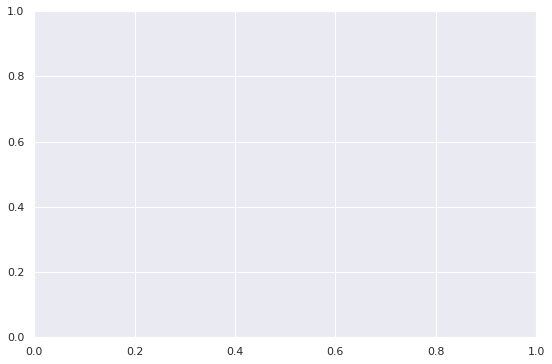

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

# Load the example flights dataset and convert to long-form
# flights_long = sns.load_dataset("flights")
# flights = flights_long.
# flights
# https://seaborn.pydata.org/examples/spreadsheet_heatmap.html
# # Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(df_tes, annot=True, fmt="d", linewidths=.5, ax=ax)

### Dataframe Perguntas

In [ ]:
# df_cat = count_categoria_por_dia(df_duvidas_copy, 'd')
# df_cat = pd.concat(df_cat)
# # df_cat.fillna(0)

# df_categorias_por_dia = df_cat.copy()
# df_categorias_por_dia.set_index('date', inplace=True)
# df_categorias_por_dia.index

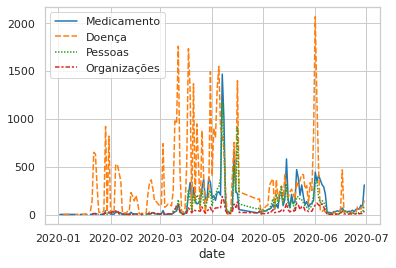

In [ ]:
# Método criar base com uma coluna para cada categoria
def cat_exemple1(df, f_floor='d'):
  categorias = ['Medicamento', 'Doença', 'Pessoas', 'Organizações']
  list_df = []
  for categoria in categorias:
    df = df_duvidas_copy.loc[df_duvidas_copy['categoria'] == categoria].copy()
    df[['data', 'categoria']].groupby(['data', 'categoria']).count()

    df = (pd.to_datetime(df['data'])
          .dt.floor(f_floor)
          .value_counts()
          .rename_axis('date')
          .reset_index(name=categoria))
    df.date = pd.to_datetime(df.date)
    list_df.append(df.copy())
  df_coc = pd.concat(list_df)
  df_coc.set_index('date', inplace=True)
  return df_coc

sns.set_theme(style="whitegrid")
sns.lineplot(data=cat_exemple1(df_duvidas_copy), palette="tab10", linewidth=1.5)

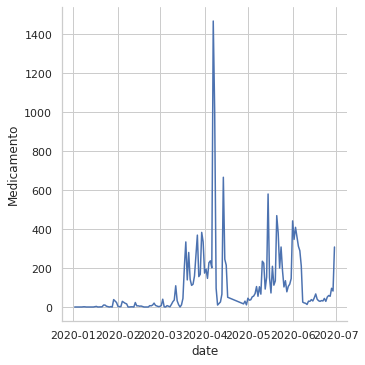

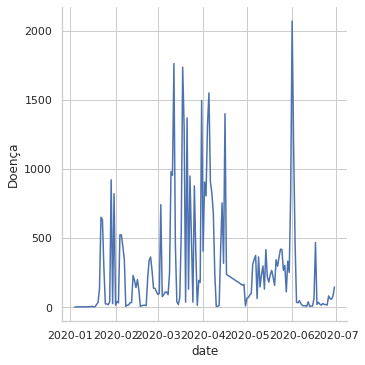

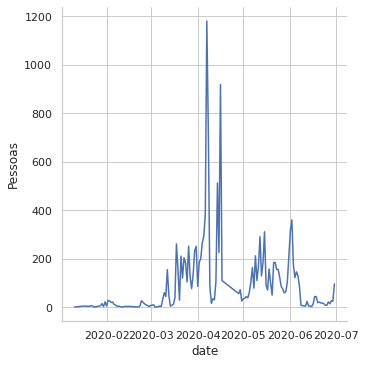

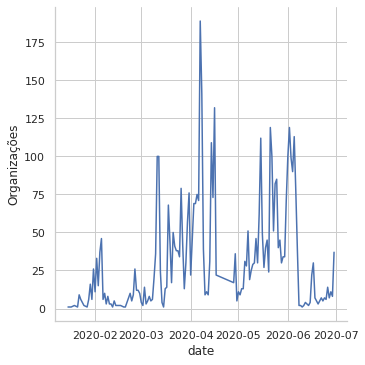

In [ ]:
# Método criar base com uma coluna para cada categoria
def generate_by_cat(df, f_floor='d'):
  categorias = ['Medicamento', 'Doença', 'Pessoas', 'Organizações']
  for categoria in categorias:
    df = df_duvidas_copy.loc[df_duvidas_copy['categoria'] == categoria].copy()
    df[['data', 'categoria']].groupby(['data', 'categoria']).count()

    df = (pd.to_datetime(df['data'])
          .dt.floor(f_floor)
          .value_counts()
          .rename_axis('date')
          .reset_index(name=categoria))
    df.date = pd.to_datetime(df.date)
    df.set_index('date', inplace=True)
    sns.relplot(x="date", y=categoria, kind="line", data=df.copy())

generate_by_cat(df_duvidas_copy)